In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('C:/Shubham/Studies/Data Science/NLP/udemy/UPDATED_NLP_COURSE/TextFiles/smsspamcollection.tsv',sep='\t')

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [7]:
# If we are missing any data it will be 1
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [8]:
len(df)

5572

In [9]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [11]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

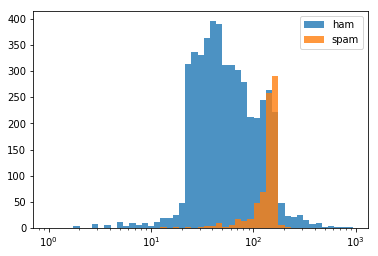

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha = 0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha = 0.8)
plt.legend(('ham','spam'))
plt.show()

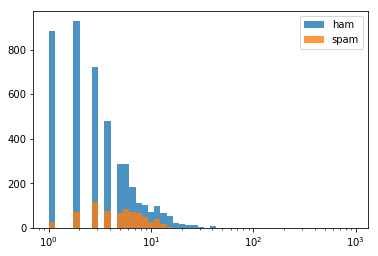

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha = 0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha = 0.8)
plt.legend(('ham','spam'))
plt.show()

In [14]:
# Split the data
from sklearn.model_selection import train_test_split

In [17]:
X = df[['length','punct']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [18]:
X_train.shape

(3900, 2)

In [19]:
X_test.shape

(1672, 2)

In [24]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr_model = LogisticRegression(solver='lbfgs')

In [27]:
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
# Accuracy

In [28]:
from sklearn import metrics

In [29]:
predictions = lr_model.predict(X_test)

In [30]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [32]:
# y_test

In [33]:
print(metrics.confusion_matrix(y_test, predictions))

[[1404   44]
 [ 219    5]]


In [34]:
df = pd.DataFrame(metrics.confusion_matrix(y_test, predictions), index=['ham','spam'], columns=['ham','spam'])

In [35]:
df

,ham,spam
ham,1404,44
spam,219,5


In [38]:
print(metrics.classification_report(y_test, predictions))
# We are getting good prediction for ham as the recall is good but model is poor in predicting spam 
# Due to bad recall of the spam

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

   micro avg       0.84      0.84      0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [39]:
print(metrics.accuracy_score(y_test, predictions))

0.8427033492822966


In [41]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

predictions = nb_model.predict(X_test)

print(metrics.confusion_matrix(y_test, predictions))

[[1438   10]
 [ 224    0]]


In [43]:
print(metrics.classification_report(y_test, predictions))
# This model is also not good we not predicting spam at all

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

   micro avg       0.86      0.86      0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [47]:
from sklearn.svm import SVC

svc_model = SVC(gamma='auto')

svc_model.fit(X_train, y_train)

predictions = svc_model.predict(X_test)

print(metrics.confusion_matrix(y_test, predictions))

[[1373   75]
 [ 121  103]]


## Feature Extraction from Text

In [2]:
%%writefile 1.txt
This is a story about cats
our feline pets
Cats are funny animals

Overwriting 1.txt


In [3]:
%%writefile 2.txt
This is a story about surfing
Catching waves is fun
Surfing is a poplar water sports

Overwriting 2.txt


### Building a Vocab

In [4]:
vocab = {}
i = 1

with open('1.txt') as f:
    x = f.read().lower().split()
    
for word in x:
    if word in vocab:
        continue
    else:
        vocab[word] = i
        i+=1
print(vocab)


{'this': 1, 'is': 2, 'a': 3, 'story': 4, 'about': 5, 'cats': 6, 'our': 7, 'feline': 8, 'pets': 9, 'are': 10, 'funny': 11, 'animals': 12}


In [5]:
with open('2.txt') as f:
    x = f.read().lower().split()
    
for word in x:
    if word in vocab:
        continue
    else:
        vocab[word] = i
        i+=1
        
print(vocab)

{'this': 1, 'is': 2, 'a': 3, 'story': 4, 'about': 5, 'cats': 6, 'our': 7, 'feline': 8, 'pets': 9, 'are': 10, 'funny': 11, 'animals': 12, 'surfing': 13, 'catching': 14, 'waves': 15, 'fun': 16, 'poplar': 17, 'water': 18, 'sports': 19}


### Feature Extraction

In [7]:
one  = ['1.txt'] + [0]*len(vocab)
one

['1.txt', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [8]:
# Map frequency of word in 1.txt
with open('1.txt') as f:
    x = f.read().lower().split()
    
for word in x:
    one[vocab[word]]+=1
    
one

['1.txt', 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

In [10]:
two  = ['2.txt'] + [0]*len(vocab)

with open('2.txt') as f:
    x = f.read().lower().split()
    
for word in x:
    two[vocab[word]]+=1
    
two

['2.txt', 1, 3, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1]

### Bag of Words and TD-IDF

In [12]:
import numpy as np
import pandas as pd

In [13]:
df = pd.read_csv('C:/Shubham/Studies/Data Science/NLP/udemy/UPDATED_NLP_COURSE/TextFiles/smsspamcollection.tsv',sep='\t')

In [14]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [15]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [16]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df['message']
y = df['label']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
count_vect = CountVectorizer()

In [27]:
# FIT Vectorizer to the data(build a vocab, count the number of words.)
# count_vect.fit(X_train)
# X_train_counts = count_vect.transform(X_train)
# Transform the original text message ---> VECTOR

X_train_counts = count_vect.fit_transform(X_train)

In [28]:
X_train_counts

<3733x7082 sparse matrix of type '<class 'numpy.int64'>'
	with 49992 stored elements in Compressed Sparse Row format>

In [29]:
X_train_counts.shape

(3733, 7082)

In [32]:
## TF-IDF

from sklearn.feature_extraction.text import TfidfTransformer

In [33]:
tfidf_transformer = TfidfTransformer()

In [35]:
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [36]:
X_train_tfidf.shape

(3733, 7082)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
vectorizer = TfidfVectorizer()

In [39]:
x_train_tfidf = vectorizer.fit_transform(X_train)

In [40]:
from sklearn.svm import LinearSVC

In [41]:
clf = LinearSVC()

In [42]:
clf.fit(X_train_tfidf, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [43]:
from sklearn.pipeline import Pipeline

In [44]:
text_clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())]) 

In [45]:
text_clf.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [46]:
predictions = text_clf.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
print(confusion_matrix(y_test, predictions))

[[1586    7]
 [  12  234]]


In [51]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

   micro avg       0.99      0.99      0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839



In [52]:
# Accuracy
from sklearn import metrics

In [53]:
print(metrics.accuracy_score(y_test, predictions))

0.989668297988037


In [55]:
text_clf.predict(["Congratulations you are being selected as a winner"])

array(['spam'], dtype=object)